In [1]:
#Import Dataset 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd
%matplotlib inline

In [2]:
#Get the Data
stores = pd.read_csv(r'E:\ML Project\Walmart Pricing\walmart-recruiting-store-sales-forecasting\stores.csv')
features = pd.read_csv(r'E:\ML Project\Walmart Pricing\walmart-recruiting-store-sales-forecasting\features\features.csv')
walmart = pd.read_csv(r'E:\ML Project\Walmart Pricing\walmart-recruiting-store-sales-forecasting\train\train.csv')
test = pd.read_csv(r'E:\ML Project\Walmart Pricing\walmart-recruiting-store-sales-forecasting\test\test.csv')

In [3]:
walmart.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [6]:
#Merge Data 
merged_df = walmart.merge(stores, how='left').merge(features,how = 'left')
merged_test = test.merge(stores, how='left').merge(features,how = 'left')



In [7]:
#Time transformation 
def time_trans(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week
    return df

time_trans(merged_df)
time_trans(merged_test)

merged_df.head()
merged_df.info()
merged_df.isna().sum()   


<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-null  float64       
 13  MarkDown5     151432 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Year                 0
Month                0
Day                  0
WeekOfYear           0
dtype: int64

<ipython-input-8-9120a9606882>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


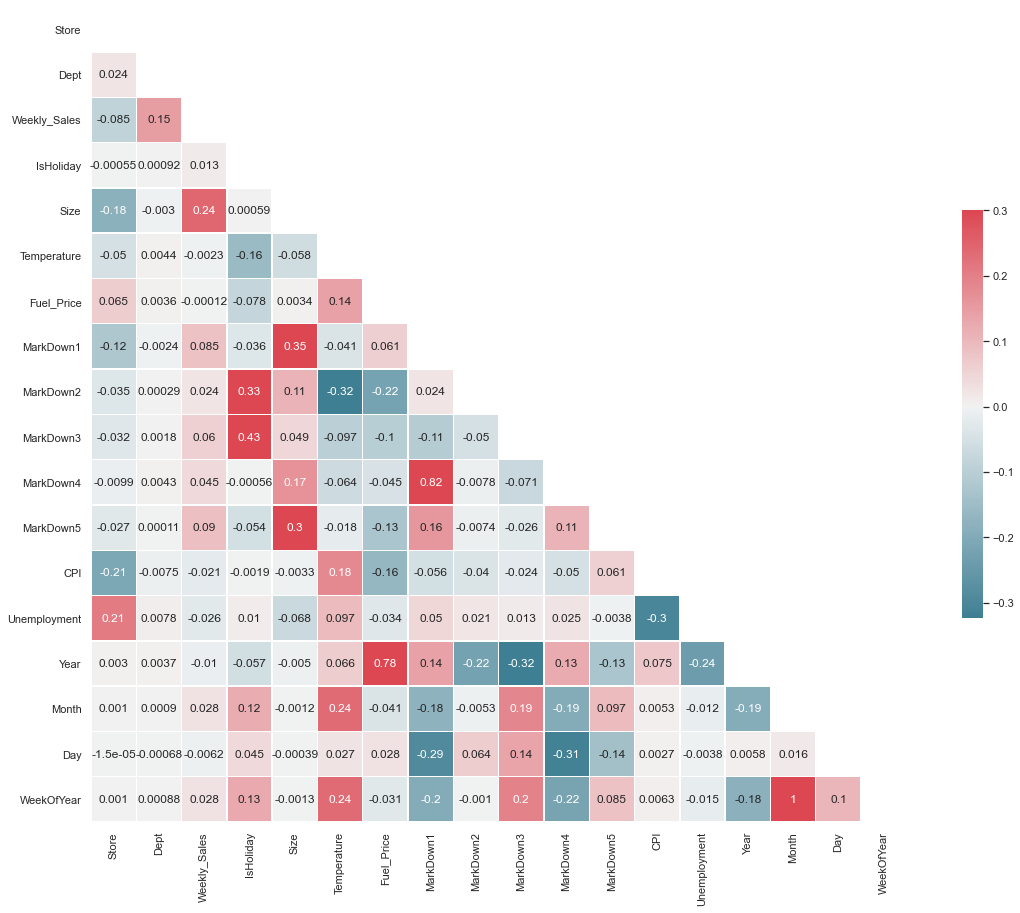

In [8]:
#Explanatory Data Analysis 
#sns.heatmap(merged_df.corr())
sns.set(style="white")

corr = merged_df.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(20, 15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)


sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

In [9]:
merged_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Year', 'Month', 'Day',
       'WeekOfYear'],
      dtype='object')

In [10]:
#define X,Y
X = merged_df[['Store', 'Dept', 'Date', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Year', 'Month', 'Day',
       'WeekOfYear']].copy()

Y = merged_df['Weekly_Sales'].copy()
X_test =  merged_test[['Store', 'Dept', 'Date', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Year', 'Month', 'Day',
       'WeekOfYear']].copy()
X_test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day,WeekOfYear
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,2012,11,2,44
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,2012,11,9,45
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,2012,11,16,46
3,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,2012,11,23,47
4,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,2012,11,30,48


In [11]:
num = ['Store', 'Dept', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Year', 'Month', 'Day',
       'WeekOfYear']
cat = ['IsHoliday', 'Type']

In [12]:
X[num].isna().sum()


Store                0
Dept                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Year                 0
Month                0
Day                  0
WeekOfYear           0
dtype: int64

In [13]:
#Fillna 
X['MarkDown1'].fillna(0, inplace=True)
X['MarkDown2'].fillna(0, inplace=True)
X['MarkDown3'].fillna(0, inplace=True)
X['MarkDown4'].fillna(0, inplace=True)
X['MarkDown5'].fillna(0, inplace=True)
X_test['MarkDown1'].fillna(0, inplace=True)
X_test['MarkDown2'].fillna(0, inplace=True)
X_test['MarkDown3'].fillna(0, inplace=True)
X_test['MarkDown4'].fillna(0, inplace=True)
X_test['MarkDown5'].fillna(0, inplace=True)
X['CPI'].fillna(X.CPI.mean(), inplace=True)
X['Unemployment'].fillna(X.Unemployment.mean(), inplace=True)
X_test['CPI'].fillna(X_test.CPI.mean(), inplace=True)
X_test['Unemployment'].fillna(X_test.Unemployment.mean(), inplace=True)

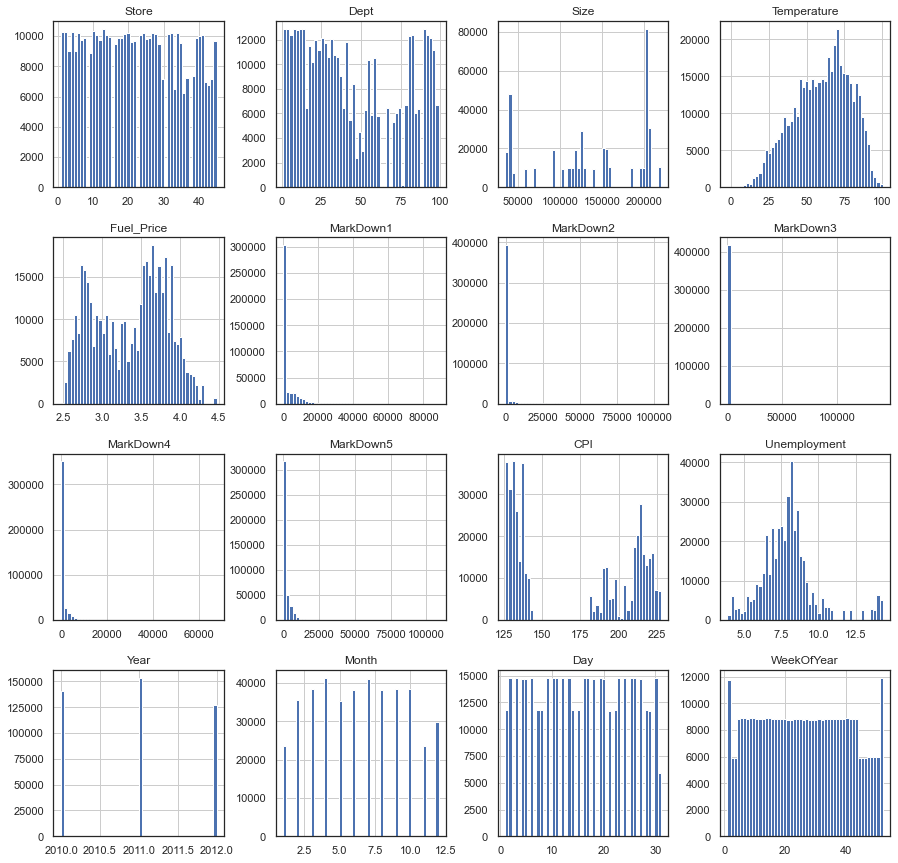

In [14]:
#Check Distribution

# Define the number of rows and columns you want

X[num].hist(bins=50, figsize=(15,15))

plt.show()

In [15]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X[num])
X[num] = scaler.transform(X[num])
X_test[num] = scaler.transform(X_test[num])

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         115064 non-null  float64       
 1   Dept          115064 non-null  float64       
 2   Date          115064 non-null  datetime64[ns]
 3   IsHoliday     115064 non-null  bool          
 4   Type          115064 non-null  object        
 5   Size          115064 non-null  float64       
 6   Temperature   115064 non-null  float64       
 7   Fuel_Price    115064 non-null  float64       
 8   MarkDown1     115064 non-null  float64       
 9   MarkDown2     115064 non-null  float64       
 10  MarkDown3     115064 non-null  float64       
 11  MarkDown4     115064 non-null  float64       
 12  MarkDown5     115064 non-null  float64       
 13  CPI           115064 non-null  float64       
 14  Unemployment  115064 non-null  float64       
 15  Year          115

In [16]:
#Categorical Columns one hot encoder
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown = "ignore").fit(X[cat])
encoder1 = OneHotEncoder(handle_unknown = "ignore").fit(X_test[cat]) 

encoded_col = encoder.get_feature_names(cat)
encoded_col1 = encoder1.get_feature_names(cat)

X[encoded_col] = encoder.transform(X[cat]).toarray()
X_test[encoded_col1] = encoder1.transform(X_test[cat]).toarray()

#X_test[encoded_col].head()

#combine numerical and categorical data

#X= X[num+encoded_col]
#X_test = X_test[num+encoded_col1]

print(X[num].shape)
print(X[encoded_col].shape)




(421570, 16)
(421570, 5)


In [17]:
X = pd.concat([X[num],X[encoded_col]],axis=1)
X_test = pd.concat([X_test[num],X_test[encoded_col1]],axis=1)
X.info()
X_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Store            421570 non-null  float64
 1   Dept             421570 non-null  float64
 2   Size             421570 non-null  float64
 3   Temperature      421570 non-null  float64
 4   Fuel_Price       421570 non-null  float64
 5   MarkDown1        421570 non-null  float64
 6   MarkDown2        421570 non-null  float64
 7   MarkDown3        421570 non-null  float64
 8   MarkDown4        421570 non-null  float64
 9   MarkDown5        421570 non-null  float64
 10  CPI              421570 non-null  float64
 11  Unemployment     421570 non-null  float64
 12  Year             421570 non-null  float64
 13  Month            421570 non-null  float64
 14  Day              421570 non-null  float64
 15  WeekOfYear       421570 non-null  float64
 16  IsHoliday_False  421570 non-null  floa

In [18]:
#PCA
from sklearn.decomposition import PCA



In [19]:
#check best number of components

explained_variance = []
for n in range(1,21):
    pca = PCA(n_components = n)
    pca.fit(X)
    
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

Text(0, 0.5, 'Variance Explained')

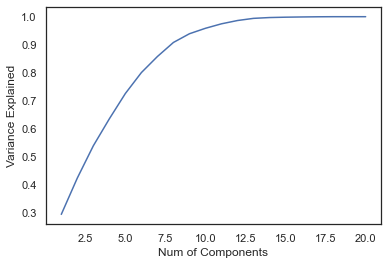

In [20]:
plt.plot(range(1,21),explained_variance)
plt.xlabel('Num of Components')
plt.ylabel('Variance Explained')

In [21]:
#Reduce to 10 components
pca_model = PCA(n_components = 10)
X_pca = pca_model.fit_transform(X)


In [22]:
X_pca.shape

(421570, 10)

In [23]:
X_pca = pd.DataFrame(X_pca, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.630130,0.135702,-0.335948,-0.082859,-0.959738,0.165629,-0.420232,-0.276803,-0.313598,-0.106523
1,-0.629943,0.441037,-0.378225,0.111093,-0.507631,1.462838,-0.427558,-0.151953,-0.347413,-0.014251
2,-0.630233,0.171334,-0.340796,-0.049440,-0.908996,0.179522,-0.424660,0.184252,-0.304731,-0.137064
3,-0.630760,0.176735,-0.338352,-0.020534,-0.868148,0.171632,-0.427263,0.415339,-0.314530,-0.097548
4,-0.630573,0.188111,-0.338324,-0.024471,-0.875364,0.113391,-0.420654,-0.287257,-0.317391,-0.087635


In [24]:
#Linear Regression 
from sklearn.model_selection import train_test_split

In [25]:
Xpca_train, Xpca_test, ypca_train, ypca_test = train_test_split(X_pca, Y, test_size = 0.3, random_state =101)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state =101)

In [26]:
from sklearn.linear_model import LinearRegression 
LR_model = LinearRegression()

In [27]:
LR_model.fit(X_train,y_train)

LinearRegression()

In [28]:
LR_pred = LR_model.predict(X_test)

In [29]:
#Evaluation 
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('MAE:\n') 
print(mean_absolute_error(y_test,LR_pred))
print('RMSE:\n') 
print(np.sqrt(mean_squared_error(y_test,LR_pred)))

MAE:

14559.681849989323
RMSE:

21584.014745484594


In [30]:
#Setup
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler



In [31]:
#Train
GB_model = GradientBoostingRegressor(random_state =1)
GB_model_pca = GradientBoostingRegressor(random_state =1)

In [32]:
GB_model.fit(X_train,y_train)
GB_model_pca.fit(Xpca_train,ypca_train)

GradientBoostingRegressor(random_state=1)

In [33]:
#Predict
GB_pred = GB_model.predict(X_test)
GB_pred_pca = GB_model_pca.predict(Xpca_test)

In [34]:
#Evaluation 
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('MAE:\n') 
print(mean_absolute_error(y_test,GB_pred))
print('\n')
print('RMSE:\n') 
print(np.sqrt(mean_squared_error(y_test,GB_pred)))

MAE:

6835.620919913155


RMSE:

11401.8047912189


In [35]:
#Evaluation(PCA)
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('MAE(PCA):\n') 
print(mean_absolute_error(ypca_test,GB_pred_pca))
print('\n')
print('RMSE(PCA):\n') 
print(np.sqrt(mean_squared_error(ypca_test,GB_pred_pca)))

MAE(PCA):

10091.422185490172


RMSE(PCA):

16192.482614850825


In [36]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(random_state=1)
RF_model_pca = RandomForestRegressor(random_state=1)

In [37]:
RF_model.fit(X_train,y_train)
RF_model_pca.fit(Xpca_train,ypca_train)

RandomForestRegressor(random_state=1)

In [38]:
RF_pred = RF_model.predict(X_test)

In [39]:
RF_pred_pca = RF_model_pca.predict(Xpca_test)

In [40]:
#Without tuning Evaluation 
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('MAE:\n') 
print(mean_absolute_error(y_test,RF_pred))
print('RMSE:\n') 
print(np.sqrt(mean_squared_error(y_test,RF_pred)))

MAE:

1345.173386198417
RMSE:

3482.7293899970764


In [41]:
#Without tuning Evaluation 
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('MAE(pca):\n') 
print(mean_absolute_error(ypca_test,RF_pred_pca))
print('\n')
print('RMSE(pca):\n') 
print(np.sqrt(mean_squared_error(ypca_test,RF_pred_pca)))

MAE(pca):

3484.539751641088


RMSE(pca):

8349.21075331998


In [42]:
#Hyperparamter Tuning with Cross Validation 
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train,y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits
